In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sympy import sympify, symbols, sqrt
import numpy as np
import itertools
from sklearn.ensemble import RandomForestRegressor

pd.set_option("display.max_columns", 200)

In [48]:
provo = pd.read_csv("Provo.csv")
provo["DATE"] = pd.to_datetime(provo["DATE"])
provo

,DATE,Month,Day,NA_Correction,MaxTemp,MinTemp,MeanTemp,RainPrecip,SnowPrecip,Wind,CO,NO2,O3,PM10,PM25,CO_LEVEL,NO2_LEVEL,O3_LEVEL,PM10_LEVEL,PM25_LEVEL,AQI,AQI_LEVEL,Year,DailyNumFines,NumPaidFines,TotalFineAmount,AvgPaidFine,Fri,Mon,Sat,Sun,Thurs,Tues,Wed,Term,Enrollment,FullTime,Holiday,Exam
0,2014-01-06,1,Monday,False,-3.3,-17.6,-10.5,0.0,0.00,6.8,1.8,47.0,0.02200,47.0,13.7,Good,Good,Good,Good,Moderate,54,Moderate,2014.0,23.0,17.0,386.0,22.705882,0,1,0,0,0,0,0,Winter,29642,25191,0,0
1,2014-01-07,1,Tuesday,False,1.1,-11.6,-4.7,0.0,0.21,5.9,1.9,47.0,0.00700,66.0,21.0,Good,Good,Good,Moderate,Moderate,70,Moderate,2014.0,52.0,46.0,1238.0,26.913043,0,0,0,0,0,1,0,Winter,29642,25191,0,0
2,2014-01-08,1,Wednesday,False,0.9,-2.6,-0.5,0.0,2.66,7.9,0.8,48.0,0.00300,53.0,33.9,Good,Good,Good,Good,Moderate,97,Moderate,2014.0,13.0,8.0,216.0,27.000000,0,0,0,0,0,0,1,Winter,29642,25191,0,0
3,2014-01-09,1,Thursday,False,0.1,-10.3,-4.4,0.0,3.92,8.9,0.7,42.0,0.02100,46.0,18.0,Good,Good,Good,Good,Moderate,63,Moderate,2014.0,3.0,3.0,350.0,116.666667,0,0,0,0,1,0,0,Winter,29642,25191,0,0
4,2014-01-10,1,Friday,False,3.1,-4.1,-0.5,0.0,0.91,7.0,1.0,46.0,0.02100,38.0,7.9,Good,Good,Good,Good,Good,43,Good,2014.0,16.0,11.0,221.0,20.090909,1,0,0,0,0,0,0,Winter,29642,25191,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,2022-12-27,12,Tuesday,False,7.2,3.4,4.9,6.6,4.27,13.2,0.6,29.8,0.03300,3.0,2.1,Good,Good,Good,Good,Good,31,Good,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,1,0,Fall,34390,30123,1,0
3278,2022-12-28,12,Wednesday,False,4.6,-4.0,0.6,0.0,3.50,9.3,0.3,26.1,0.02900,3.0,1.1,Good,Good,Good,Good,Good,27,Good,2022.0,1.0,1.0,35.0,35.000000,0,0,0,0,0,0,1,Fall,34390,30123,1,0
3279,2022-12-29,12,Thursday,False,1.5,-5.9,-2.5,0.0,0.49,5.8,0.3,26.9,0.03200,6.0,1.9,Good,Good,Good,Good,Good,30,Good,2022.0,10.0,7.0,220.0,31.428571,0,0,0,0,1,0,0,Fall,34390,30123,1,0
3280,2022-12-30,12,Friday,False,3.0,-3.7,0.6,0.0,7.56,6.1,0.4,14.2,0.03800,2.0,1.3,Good,Good,Good,Good,Good,35,Good,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,Fall,34390,30123,1,0


In [30]:
provo["DATE"] = pd.to_datetime(provo["DATE"])

In [4]:
metrics = ["CO", "NO2", "O3", "PM10", "PM25", "AQI", "MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip", "Wind", "DailyNumFines", "NumPaidFines", "TotalFineAmount"]
# for metric in metrics:
#     provo[metric + "_PctChange"] = provo[metric].pct_change()*100

# provo

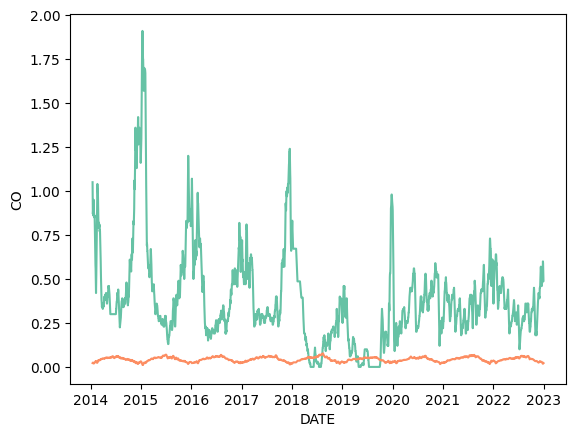

In [5]:
sns.set_palette("Set2")

rolling_means = provo[["CO", "O3"]].rolling(window=10).mean()
rolling_means["DATE"] = provo["DATE"]

sns.lineplot(x="DATE", y="CO", data=rolling_means)
sns.lineplot(x="DATE", y="O3", data=rolling_means)

plt.show()

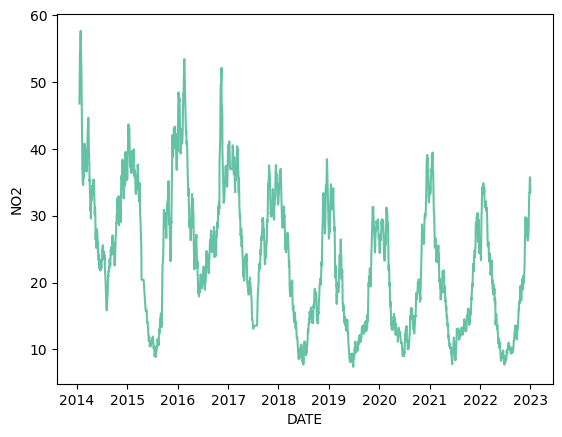

In [6]:
rolling_means = provo[["NO2"]].rolling(window=15).mean()
rolling_means["DATE"] = provo["DATE"]

sns.lineplot(x="DATE", y="NO2", data=rolling_means)

plt.show()

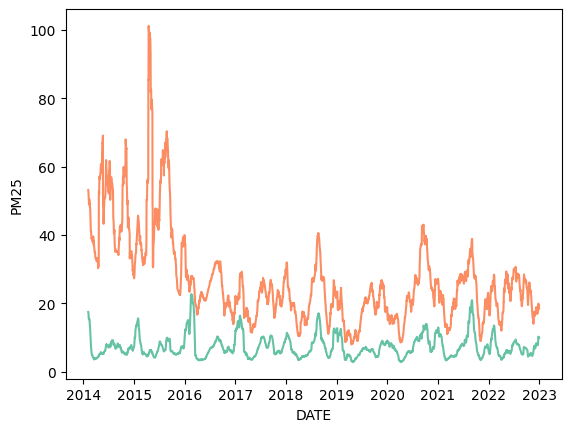

In [7]:
rolling_means = provo[["PM10", "PM25"]].rolling(window=30).mean()
rolling_means["DATE"] = provo["DATE"]

sns.lineplot(x="DATE", y="PM25", data=rolling_means)
sns.lineplot(x="DATE", y="PM10", data=rolling_means)

plt.show()

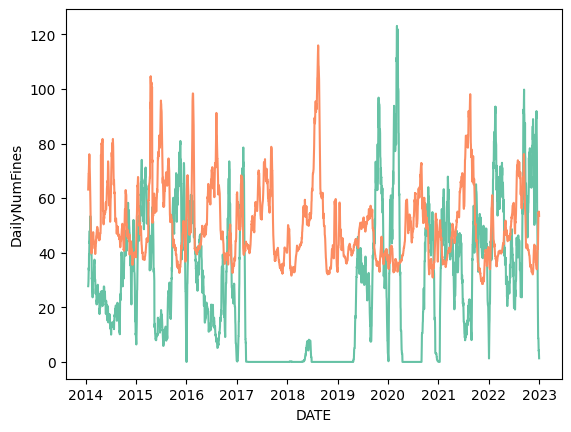

In [8]:
rolling_means = provo[["DailyNumFines", "NumPaidFines", "TotalFineAmount", "AQI"]].rolling(window=15).mean()
rolling_means["DATE"] = provo["DATE"]

sns.lineplot(x="DATE", y="DailyNumFines", data=rolling_means)
sns.lineplot(x="DATE", y="AQI", data=rolling_means)

plt.show()

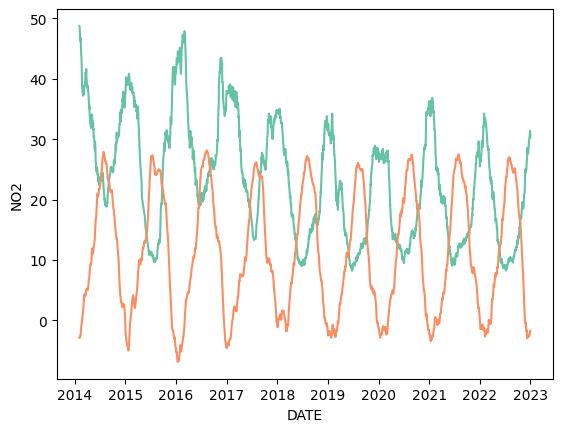

In [9]:
rolling_means = provo[["NO2", "MeanTemp"]].rolling(window=30).mean()
rolling_means["DATE"] = provo["DATE"]

sns.lineplot(x="DATE", y="NO2", data=rolling_means)
sns.lineplot(x="DATE", y="MeanTemp", data=rolling_means)

plt.show()

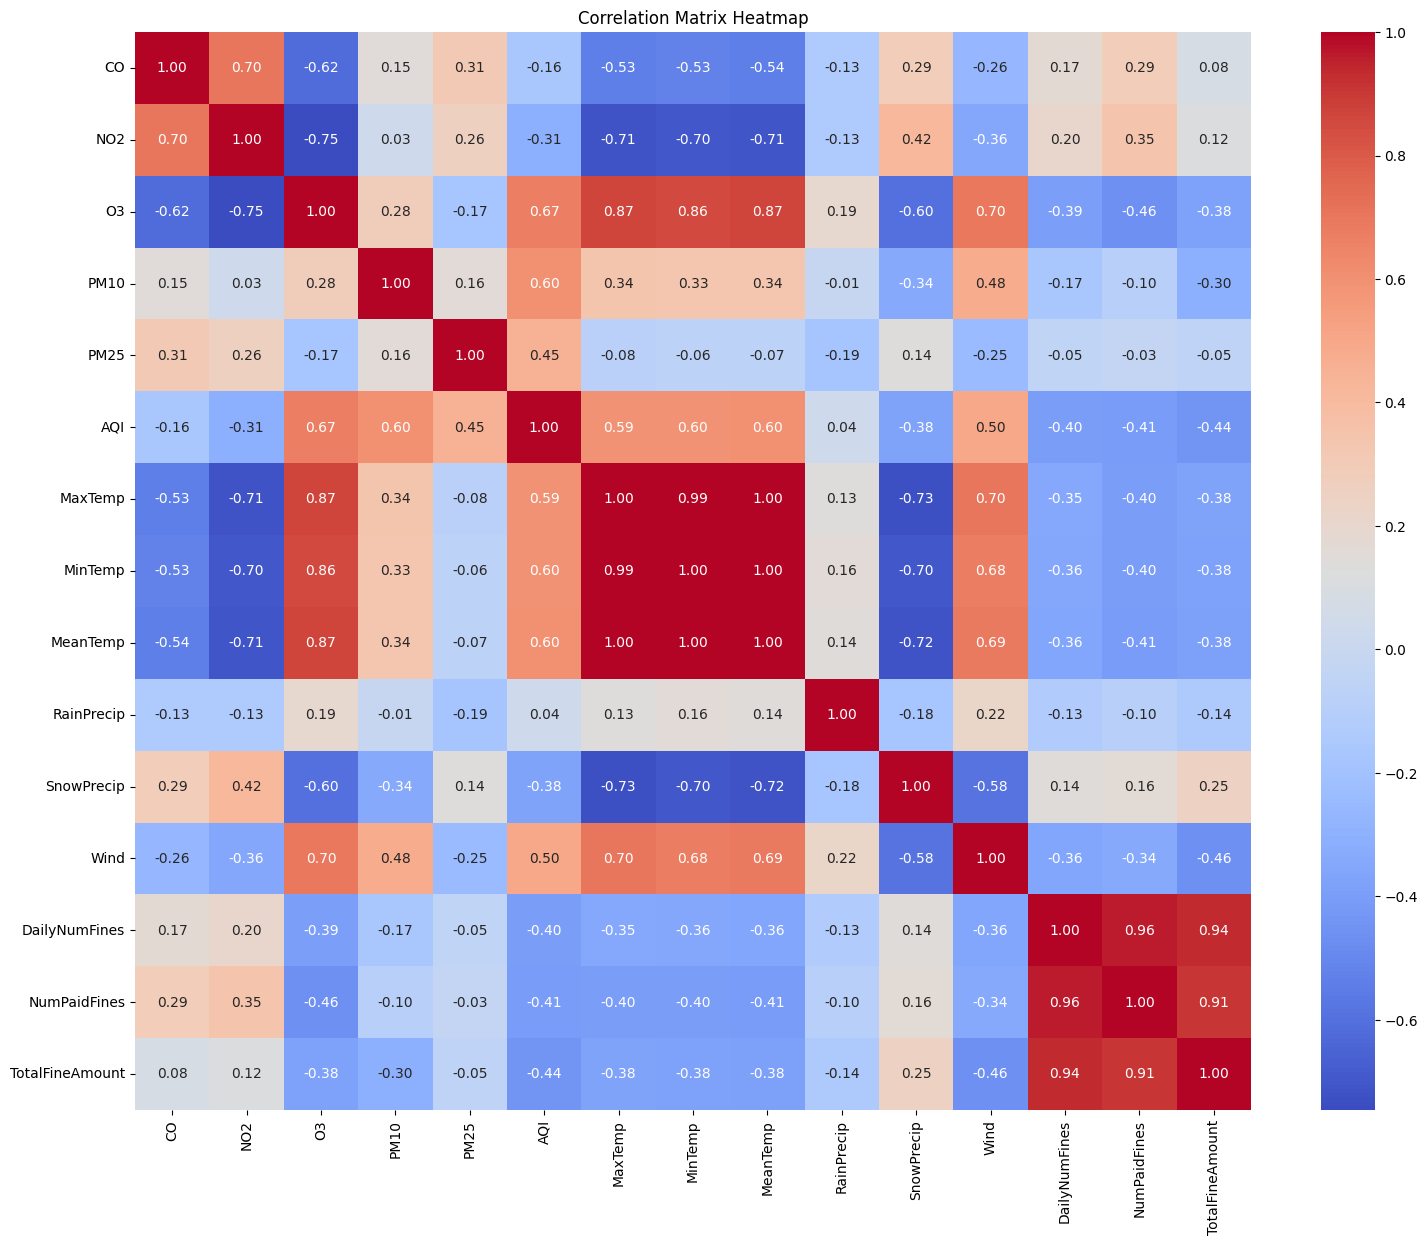

In [11]:
metrics = [x for x in ["CO", "NO2", "O3", "PM10", "PM25", "AQI", "MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip", "Wind", "DailyNumFines", "NumPaidFines", "TotalFineAmount"]]

provo["DailyNumFinesRollingMean"] = provo["DailyNumFines"].rolling(window=30).mean()
provo = provo[(provo["DailyNumFinesRollingMean"] > 0)].copy()

plt.figure(figsize=(18, 14))

sns.heatmap(provo[metrics].rolling(window=30).mean().corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

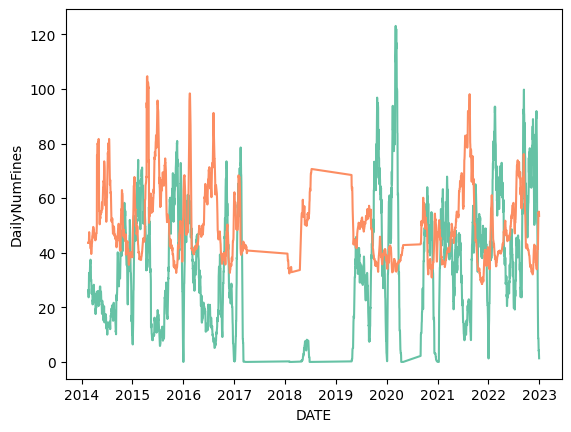

In [12]:
rolling_means = provo[["DailyNumFines", "NumPaidFines", "TotalFineAmount", "AQI"]].rolling(window=15).mean()
rolling_means["DATE"] = provo["DATE"]

sns.lineplot(x="DATE", y="DailyNumFines", data=rolling_means)
sns.lineplot(x="DATE", y="AQI", data=rolling_means)

plt.show()

In [27]:
lags = 30
lag_cols = []

for lag in range(1, lags + 1):
    lagged_cols = [provo[metric].shift(lag).rename(f"{metric}_Lag{lag}") for metric in metrics]
    lag_cols.append(pd.concat(lagged_cols, axis=1))

provo = pd.concat([provo] + lag_cols, axis=1)

In [28]:
provo = provo.iloc[lags:]

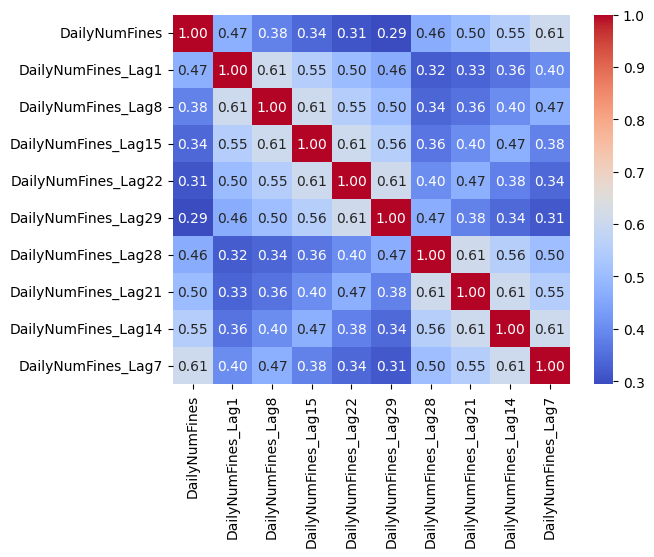

In [50]:
rolling_means = provo[["DailyNumFines", "DailyNumFines_Lag1", "DailyNumFines_Lag8", "DailyNumFines_Lag15", "DailyNumFines_Lag22", "DailyNumFines_Lag29", "DailyNumFines_Lag28", "DailyNumFines_Lag21", "DailyNumFines_Lag14", "DailyNumFines_Lag7"]] #.rolling(window=5).mean()

sns.heatmap(rolling_means.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [70]:
model = LinearRegression()
model.fit(provo[[f"DailyNumFines_Lag{lag}" for lag in range(1, lags+1)]], provo["DailyNumFines"])

LinearRegression()

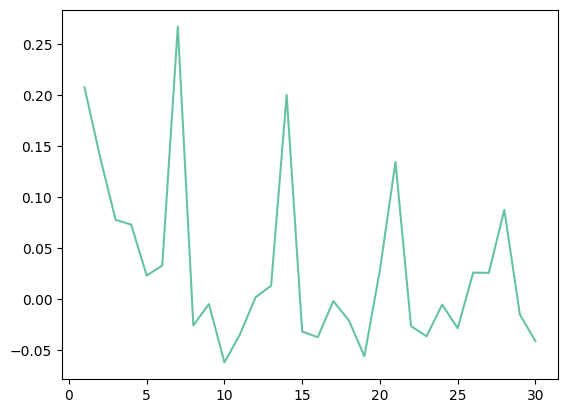

In [71]:
sns.lineplot(x=range(1,lags+1), y=model.coef_)

plt.show()

In [92]:
provo[provo["Day"].isin(["Monday"])]["AQI"].rolling(window=30).mean().dropna()

238     56.066667
245     55.966667
252     55.966667
259     55.533333
266     55.600000
          ...    
3248    51.766667
3255    51.300000
3262    51.366667
3269    51.933333
3276    53.566667
Name: AQI, Length: 435, dtype: float64

In [97]:
selected_metric = "O3"
rolling_means = provo[provo["Day"].isin(["Monday"])].copy().groupby("Day")[[selected_metric]].rolling(window=30).mean().reset_index(drop=True)
rolling_means["DATE"] = provo[provo["Day"].isin(["Monday"])]["DATE"]
rolling_means["Day"] = provo[provo["Day"].isin(["Monday"])]["Day"]
metric_plot = px.line(rolling_means, x="DATE", y=selected_metric, color="Day")

In [26]:
x = symbols('NO2')

In [27]:
x_function = "sqrt(NO2)"
x_function = sympify(x_function)
x_function

sqrt(NO2)

In [28]:
provo["NO2"].apply(lambda m: x_function.subs(x, m))

0       6.85565460040104
1       6.85565460040104
2       6.92820323027551
3       6.48074069840786
4       6.78232998312527
              ...       
3277    5.45893762558247
3278    5.10881590977792
3279    5.18652099195598
3280    3.76828873628335
3281    4.12310562561766
Name: NO2, Length: 3282, dtype: object

In [50]:
provo = pd.read_csv("Provo.csv")
provo["DATE"] = pd.to_datetime(provo["DATE"])

model_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                  "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI", "Mon", 
                  "Tues", "Wed", "Thurs", "Fri", "Sun", "FullTime", 
                  "Holiday", "Exam", "February", "March", "April", "May", 
                  "June", "July", "August", "September", "October", "November",
                  "December", "Spring", "Summer", "Fall", "DailyNumFines_Lag1",
                  "DailyNumFines_Lag7",
                  "DailyNumFines_Lag14", "DailyNumFines_Lag21", 
                  "DailyNumFines_Lag28"]

lags = [1, 7, 14, 21, 28]

provo['log_DailyNumFines'] = np.log(provo['DailyNumFines'] + 1)
for lag in lags:
    provo[f'DailyNumFines_Lag{lag}'] = provo['DailyNumFines'].shift(lag)

# Missing Data
end_date = "2019-04-23"
begin_date = "2017-03-08"

# COVID
covid_begin_date = "2020-03-14"
covid_end_date = "2020-09-07"

def truncate_provo(p):
    return p[~((p['DATE'] >= pd.to_datetime(begin_date)) & (p['DATE'] <= pd.to_datetime(end_date)) |
               (p['DATE'] >= pd.to_datetime(covid_begin_date)) & (p['DATE'] <= pd.to_datetime(covid_end_date)))]


# Add dummy variables
provo = pd.concat([provo, pd.get_dummies(provo["Term"])], axis=1)

log_factors = ["RainPrecip", "SnowPrecip", "Wind", "NO2", "PM10", "PM25", "AQI", "FullTime"]

# Log transformation for log factors
for factor in log_factors:
    provo[factor] = np.log(provo[factor] + 1)

polynomial_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                      "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI",
                      "FullTime", "DailyNumFines_Lag1",
                      "DailyNumFines_Lag7",
                      "DailyNumFines_Lag14", "DailyNumFines_Lag21", 
                      "DailyNumFines_Lag28"]

for factor in polynomial_factors:
    provo[f'{factor}_2'] = provo[factor]**2
    
polynomial_factors = [f'{factor}_2' for factor in polynomial_factors]

env_lag_factors = []

def add_interaction_factors():
    global provo
    interaction_factors = []

    env_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                   "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI"]

    days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sun"]

    months = ["February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    # Create dummy variables for months
    for month in months:
        col = provo['Month'] == month
        col.name = month
        provo = pd.concat([provo, col], axis=1)
    seasons = ["Spring", "Summer", "Fall"]
    lag_factors = ["DailyNumFines_Lag1", "DailyNumFines_Lag7", "DailyNumFines_Lag14", "DailyNumFines_Lag21", "DailyNumFines_Lag28"]

    combinations = list(itertools.combinations(env_factors, 2))
    for combination in combinations:
        factor = '_'.join(combination)
        interaction_factors.append(factor)
        col = provo[combination[0]] * provo[combination[1]]
        col.name = factor
        provo = pd.concat([provo, col], axis=1)

    for day in days:
        factor = f'{day}_DailyNumFines_Lag1'
        env_lag_factors.append(factor)
        interaction_factors.append(factor)
        col = provo[day] * provo['DailyNumFines_Lag1']
        col.name = factor
        provo = pd.concat([provo, col], axis=1)

    for env_factor in env_factors:
        for lag_factor in lag_factors:
            factor = f'{env_factor}_{lag_factor}'
            env_lag_factors.append(factor)
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[lag_factor]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

        for month in months:
            factor = f'{env_factor}_{month}'
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[month]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

        for season in seasons:
            factor = f'{env_factor}_{season}'
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[season]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

    return interaction_factors

interaction_factors = add_interaction_factors()

model_factors = model_factors + interaction_factors + polynomial_factors
model_factors

['MaxTemp',
 'MinTemp',
 'MeanTemp',
 'RainPrecip',
 'SnowPrecip',
 'Wind',
 'CO',
 'NO2',
 'O3',
 'PM10',
 'PM25',
 'AQI',
 'Mon',
 'Tues',
 'Wed',
 'Thurs',
 'Fri',
 'Sun',
 'FullTime',
 'Holiday',
 'Exam',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'Spring',
 'Summer',
 'Fall',
 'DailyNumFines_Lag1',
 'DailyNumFines_Lag7',
 'DailyNumFines_Lag14',
 'DailyNumFines_Lag21',
 'DailyNumFines_Lag28',
 'MaxTemp_MinTemp',
 'MaxTemp_MeanTemp',
 'MaxTemp_RainPrecip',
 'MaxTemp_SnowPrecip',
 'MaxTemp_Wind',
 'MaxTemp_CO',
 'MaxTemp_NO2',
 'MaxTemp_O3',
 'MaxTemp_PM10',
 'MaxTemp_PM25',
 'MaxTemp_AQI',
 'MinTemp_MeanTemp',
 'MinTemp_RainPrecip',
 'MinTemp_SnowPrecip',
 'MinTemp_Wind',
 'MinTemp_CO',
 'MinTemp_NO2',
 'MinTemp_O3',
 'MinTemp_PM10',
 'MinTemp_PM25',
 'MinTemp_AQI',
 'MeanTemp_RainPrecip',
 'MeanTemp_SnowPrecip',
 'MeanTemp_Wind',
 'MeanTemp_CO',
 'MeanTemp_NO2',
 'MeanTemp_O3',
 'MeanTemp_PM10',
 'MeanT

In [52]:
len(model_factors)

358

In [59]:
rf = RandomForestRegressor(n_estimators=100, random_state=1120)
rf.fit(provo[model_factors].iloc[max(lags):], provo["log_DailyNumFines"].iloc[max(lags):])

RandomForestRegressor(random_state=1120)

In [63]:
rf_predictive = provo.merge(pd.DataFrame({
    "DATE": provo["DATE"].iloc[max(lags):],
    "Model": "Random Forest",
    "PredictedDailyNumFines": np.exp(rf.predict(provo[model_factors].iloc[max(lags):]))
}))
rf_predictive.to_csv("RF_Data.csv", index=False)

In [64]:
model = LinearRegression()

In [65]:
provo = truncate_provo(provo)

lasso_factors = [
    "NO2", "AQI", "CO", "SnowPrecip", "MinTemp", "MaxTemp", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sun", "FullTime", "Holiday", "Exam", "DailyNumFines_Lag1", "DailyNumFines_Lag14", "DailyNumFines_Lag21", "February", "May", "November", "Spring", "Fall", "RainPrecip", "December", "Wind", "DailyNumFines_Lag7", "August", "O3", "PM10", "DailyNumFines_Lag28", "PM25", "July",
    "SnowPrecip_CO", "Mon_DailyNumFines_Lag1", "Tues_DailyNumFines_Lag1", "Wed_DailyNumFines_Lag1", "Thurs_DailyNumFines_Lag1", "Fri_DailyNumFines_Lag1", "Sun_DailyNumFines_Lag1",
    "MinTemp_DailyNumFines_Lag1", "MaxTemp_DailyNumFines_Lag14", "MaxTemp_DailyNumFines_Lag21", "MinTemp_February", "MinTemp_May", "MinTemp_November", "MinTemp_Spring", "MinTemp_Fall", "RainPrecip_May", "RainPrecip_December", "SnowPrecip_DailyNumFines_Lag1", "SnowPrecip_DailyNumFines_Lag14", "SnowPrecip_DailyNumFines_Lag21",
    "SnowPrecip_February", "Wind_DailyNumFines_Lag7", "Wind_DailyNumFines_Lag14", "Wind_Summer", "CO_August", "CO_November", "NO2_August", "O3_DailyNumFines_Lag7", "O3_DailyNumFines_Lag14", "O3_May", "PM10_DailyNumFines_Lag21", "PM10_DailyNumFines_Lag28", "PM25_July", "PM25_December", "CO_2", "FullTime_2", "DailyNumFines_Lag1_2", "DailyNumFines_Lag7_2"
]

provo_lasso = model.fit(provo[lasso_factors].iloc[np.max(lags):], provo["log_DailyNumFines"].iloc[np.max(lags):])

In [68]:
np.exp(provo_lasso.predict(provo[lasso_factors].iloc[np.max(lags):]))

array([46.81005919, 58.39336389, 66.42217623, ...,  2.95475899,
        1.71666612,  0.42921039])

In [69]:
difference = 1

difference_factors = [
    "NO2", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sun", "Holiday", "Exam", "MaxTemp", "PM25", "MinTemp", "MeanTemp", "RainPrecip", "CO", "SnowPrecip", "Wind", "O3", "AQI", "October", "December", "June", "Wind", "April",  "May", "August", "Spring", "Summer", "PM10", "September", "February",
    "MaxTemp_PM25", "MinTemp_MeanTemp", "RainPrecip_CO", "SnowPrecip_CO", "Wind_NO2", "NO2_O3", "PM25_AQI", "MeanTemp_October", "RainPrecip_December", "SnowPrecip_June", "Wind_April", "Wind_May", "CO_April", "CO_August", "CO_December", "CO_Spring", "NO2_August",
    "NO2_Spring", "NO2_Summer", "PM10_April", "PM10_June", "PM10_September", "PM10_December", "AQI_February", "SnowPrecip_2"
]

for factor in ["log_DailyNumFines"] + difference_factors:
    col = provo[factor].shift(difference)
    col.name = factor + "_change"
    provo = pd.concat([provo, col], axis=1)

difference_factors = [factor + "_change" for factor in difference_factors]

provo_first_difference = model.fit(provo[difference_factors].iloc[difference:], provo["log_DailyNumFines_change"].iloc[difference:])

In [108]:
provo = pd.read_csv("Provo.csv")
provo["DATE"] = pd.to_datetime(provo["DATE"])

model_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                  "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI", "Mon", 
                  "Tues", "Wed", "Thurs", "Fri", "Sun", "FullTime", 
                  "Holiday", "Exam", "February", "March", "April", "May", 
                  "June", "July", "August", "September", "October", "November",
                  "December", "Spring", "Summer", "Fall", "DailyNumFines_Lag1",
                  "DailyNumFines_Lag7",
                  "DailyNumFines_Lag14", "DailyNumFines_Lag21", 
                  "DailyNumFines_Lag28"]

lags = [1, 7, 14, 21, 28]

provo['log_DailyNumFines'] = np.log(provo['DailyNumFines'] + 1)
for lag in lags:
    provo[f'DailyNumFines_Lag{lag}'] = provo['DailyNumFines'].shift(lag)

# Missing Data
end_date = "2019-04-23"
begin_date = "2017-03-08"

# COVID
covid_begin_date = "2020-03-14"
covid_end_date = "2020-09-07"

def truncate_provo(p):
    return p[~((p['DATE'] >= pd.to_datetime(begin_date)) & (p['DATE'] <= pd.to_datetime(end_date)) |
               (p['DATE'] >= pd.to_datetime(covid_begin_date)) & (p['DATE'] <= pd.to_datetime(covid_end_date)))]


# Add dummy variables
provo = pd.concat([provo, pd.get_dummies(provo["Term"])], axis=1)

log_factors = ["RainPrecip", "SnowPrecip", "Wind", "NO2", "PM10", "PM25", "AQI", "FullTime"]

# Log transformation for log factors
for factor in log_factors:
    provo[factor] = np.log(provo[factor] + 1)

polynomial_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                      "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI",
                      "FullTime", "DailyNumFines_Lag1",
                      "DailyNumFines_Lag7",
                      "DailyNumFines_Lag14", "DailyNumFines_Lag21", 
                      "DailyNumFines_Lag28"]

for factor in polynomial_factors:
    provo[f'{factor}_2'] = provo[factor]**2
    
polynomial_factors = [f'{factor}_2' for factor in polynomial_factors]

env_lag_factors = []

def add_interaction_factors():
    global provo
    interaction_factors = []

    env_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                   "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI"]

    days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sun"]

    months = ["February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    # Create dummy variables for months
    for month in months:
        col = provo['Month'] == month
        col.name = month
        provo = pd.concat([provo, col], axis=1)
    seasons = ["Spring", "Summer", "Fall"]
    lag_factors = ["DailyNumFines_Lag1", "DailyNumFines_Lag7", "DailyNumFines_Lag14", "DailyNumFines_Lag21", "DailyNumFines_Lag28"]

    combinations = list(itertools.combinations(env_factors, 2))
    for combination in combinations:
        factor = '_'.join(combination)
        interaction_factors.append(factor)
        col = provo[combination[0]] * provo[combination[1]]
        col.name = factor
        provo = pd.concat([provo, col], axis=1)

    for day in days:
        factor = f'{day}_DailyNumFines_Lag1'
        env_lag_factors.append(factor)
        interaction_factors.append(factor)
        col = provo[day] * provo['DailyNumFines_Lag1']
        col.name = factor
        provo = pd.concat([provo, col], axis=1)

    for env_factor in env_factors:
        for lag_factor in lag_factors:
            factor = f'{env_factor}_{lag_factor}'
            env_lag_factors.append(factor)
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[lag_factor]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

        for month in months:
            factor = f'{env_factor}_{month}'
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[month]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

        for season in seasons:
            factor = f'{env_factor}_{season}'
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[season]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

    return interaction_factors

interaction_factors = add_interaction_factors()

model_factors = model_factors + interaction_factors + polynomial_factors

provo_truncated = truncate_provo(provo)

In [109]:
provo_truncated = truncate_provo(provo)
lasso_factors = [
    "NO2", "AQI", "CO", "SnowPrecip", "MinTemp", "MaxTemp", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sun", "FullTime", "Holiday", "Exam", "DailyNumFines_Lag1", "DailyNumFines_Lag14", "DailyNumFines_Lag21", "February", "May", "November", "Spring", "Fall", "RainPrecip", "December", "Wind", "DailyNumFines_Lag7", "August", "O3", "PM10", "DailyNumFines_Lag28", "PM25", "July",
    "SnowPrecip_CO", "Mon_DailyNumFines_Lag1", "Tues_DailyNumFines_Lag1", "Wed_DailyNumFines_Lag1", "Thurs_DailyNumFines_Lag1", "Fri_DailyNumFines_Lag1", "Sun_DailyNumFines_Lag1",
    "MinTemp_DailyNumFines_Lag1", "MaxTemp_DailyNumFines_Lag14", "MaxTemp_DailyNumFines_Lag21", "MinTemp_February", "MinTemp_May", "MinTemp_November", "MinTemp_Spring", "MinTemp_Fall", "RainPrecip_May", "RainPrecip_December", "SnowPrecip_DailyNumFines_Lag1", "SnowPrecip_DailyNumFines_Lag14", "SnowPrecip_DailyNumFines_Lag21",
    "SnowPrecip_February", "Wind_DailyNumFines_Lag7", "Wind_DailyNumFines_Lag14", "Wind_Summer", "CO_August", "CO_November", "NO2_August", "O3_DailyNumFines_Lag7", "O3_DailyNumFines_Lag14", "O3_May", "PM10_DailyNumFines_Lag21", "PM10_DailyNumFines_Lag28", "PM25_July", "PM25_December", "CO_2", "FullTime_2", "DailyNumFines_Lag1_2", "DailyNumFines_Lag7_2"
]

provo_lasso = model.fit(provo_truncated[lasso_factors].iloc[np.max(lags):], provo_truncated["log_DailyNumFines"].iloc[np.max(lags):])

lasso_df = pd.DataFrame({
    "DATE": provo["DATE"].iloc[np.max(lags):].tolist(),
    "Model": ["Multilinear (w/ Weekly Lags)"]*provo.iloc[np.max(lags):].shape[0],
    "PredictedDailyNumFines": np.exp(provo_lasso.predict(provo[lasso_factors].iloc[np.max(lags):]))
})

lasso_df = lasso_df.merge(provo, how="right")

difference = 1

difference_factors = [
    "NO2", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sun", "Holiday", "Exam", "MaxTemp", "PM25", "MinTemp", "MeanTemp", "RainPrecip", "CO", "SnowPrecip", "Wind", "O3", "AQI", "October", "December", "June", "Wind", "April",  "May", "August", "Spring", "Summer", "PM10", "September", "February",
    "MaxTemp_PM25", "MinTemp_MeanTemp", "RainPrecip_CO", "SnowPrecip_CO", "Wind_NO2", "NO2_O3", "PM25_AQI", "MeanTemp_October", "RainPrecip_December", "SnowPrecip_June", "Wind_April", "Wind_May", "CO_April", "CO_August", "CO_December", "CO_Spring", "NO2_August",
    "NO2_Spring", "NO2_Summer", "PM10_April", "PM10_June", "PM10_September", "PM10_December", "AQI_February", "SnowPrecip_2"
]

for factor in ["log_DailyNumFines"] + difference_factors:
    col = provo[factor].shift(difference)
    col.name = factor + "_change"
    provo_truncated = pd.concat([provo_truncated, col], axis=1)
    provo = pd.concat([provo, col], axis=1)

difference_factors = [factor + "_change" for factor in difference_factors]

provo_first_difference = model.fit(provo_truncated[difference_factors].iloc[difference:], provo_truncated["log_DailyNumFines_change"].iloc[difference:])

difference_df = pd.DataFrame({
    "DATE": provo["DATE"].iloc[difference:].tolist(),
    "Model": ["First Differences"]*provo.iloc[difference:].shape[0],
    "PredictedDailyNumFines": np.exp(provo_first_difference.predict(provo[difference_factors].iloc[difference:]) + np.log(provo["DailyNumFines"].shift(difference) + 1).iloc[1:])
})

difference_df = difference_df.merge(provo, how="right")



In [167]:
np.median((rf_df["PredictedDailyNumFines"].dropna()))

7.387094529366738

In [113]:
rf_df = pd.read_csv("RF_Data.csv")

In [192]:
provo = pd.read_csv("Provo.csv")
provo["DATE"] = pd.to_datetime(provo["DATE"])

model_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI", "Mon", 
                "Tues", "Wed", "Thurs", "Fri", "Sun", "FullTime", 
                "Holiday", "Exam", "February", "March", "April", "May", 
                "June", "July", "August", "September", "October", "November",
                "December", "Spring", "Summer", "Fall", "DailyNumFines_Lag1",
                "DailyNumFines_Lag7",
                "DailyNumFines_Lag14", "DailyNumFines_Lag21", 
                "DailyNumFines_Lag28"]

lags = [1, 7, 14, 21, 28]

provo['log_DailyNumFines'] = np.log(provo['DailyNumFines'] + 1)
for lag in lags:
    provo[f'DailyNumFines_Lag{lag}'] = provo['DailyNumFines'].shift(lag)

# Missing Data
end_date = "2019-04-23"
begin_date = "2017-03-08"

# COVID
covid_begin_date = "2020-03-14"
covid_end_date = "2020-09-07"

def truncate_provo(p):
    return p[~((p['DATE'] >= pd.to_datetime(begin_date)) & (p['DATE'] <= pd.to_datetime(end_date)) |
            (p['DATE'] >= pd.to_datetime(covid_begin_date)) & (p['DATE'] <= pd.to_datetime(covid_end_date)))]


# Add dummy variables
provo = pd.concat([provo, pd.get_dummies(provo["Term"])], axis=1)

log_factors = ["RainPrecip", "SnowPrecip", "Wind", "NO2", "PM10", "PM25", "AQI", "FullTime"]

# Log transformation for log factors
for factor in log_factors:
    provo[factor] = np.log(provo[factor] + 1)

polynomial_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                    "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI",
                    "FullTime", "DailyNumFines_Lag1",
                    "DailyNumFines_Lag7",
                    "DailyNumFines_Lag14", "DailyNumFines_Lag21", 
                    "DailyNumFines_Lag28"]

for factor in polynomial_factors:
    provo[f'{factor}_2'] = provo[factor]**2

polynomial_factors = [f'{factor}_2' for factor in polynomial_factors]

env_lag_factors = []

def add_interaction_factors():
    global provo
    interaction_factors = []

    env_factors = ["MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip",
                "Wind", "CO", "NO2", "O3", "PM10", "PM25", "AQI"]

    days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sun"]

    months = ["February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    # Create dummy variables for months
    for month in months:
        col = provo['Month'] == month
        col.name = month
        provo = pd.concat([provo, col], axis=1)
    seasons = ["Spring", "Summer", "Fall"]
    lag_factors = ["DailyNumFines_Lag1", "DailyNumFines_Lag7", "DailyNumFines_Lag14", "DailyNumFines_Lag21", "DailyNumFines_Lag28"]

    combinations = list(itertools.combinations(env_factors, 2))
    for combination in combinations:
        factor = '_'.join(combination)
        interaction_factors.append(factor)
        col = provo[combination[0]] * provo[combination[1]]
        col.name = factor
        provo = pd.concat([provo, col], axis=1)

    for day in days:
        factor = f'{day}_DailyNumFines_Lag1'
        env_lag_factors.append(factor)
        interaction_factors.append(factor)
        col = provo[day] * provo['DailyNumFines_Lag1']
        col.name = factor
        provo = pd.concat([provo, col], axis=1)

    for env_factor in env_factors:
        for lag_factor in lag_factors:
            factor = f'{env_factor}_{lag_factor}'
            env_lag_factors.append(factor)
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[lag_factor]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

        for month in months:
            factor = f'{env_factor}_{month}'
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[month]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

        for season in seasons:
            factor = f'{env_factor}_{season}'
            interaction_factors.append(factor)
            col = provo[env_factor] * provo[season]
            col.name = factor
            provo = pd.concat([provo, col], axis=1)

    return interaction_factors

interaction_factors = add_interaction_factors()

model_factors = model_factors + interaction_factors + polynomial_factors

provo_truncated = truncate_provo(provo)

lasso_factors = [
    "NO2", "AQI", "CO", "SnowPrecip", "MinTemp", "MaxTemp", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sun", "FullTime", "Holiday", "Exam", "DailyNumFines_Lag1", "DailyNumFines_Lag14", "DailyNumFines_Lag21", "February", "May", "November", "Spring", "Fall", "RainPrecip", "December", "Wind", "DailyNumFines_Lag7", "August", "O3", "PM10", "DailyNumFines_Lag28", "PM25", "July",
    "SnowPrecip_CO", "Mon_DailyNumFines_Lag1", "Tues_DailyNumFines_Lag1", "Wed_DailyNumFines_Lag1", "Thurs_DailyNumFines_Lag1", "Fri_DailyNumFines_Lag1", "Sun_DailyNumFines_Lag1",
    "MinTemp_DailyNumFines_Lag1", "MaxTemp_DailyNumFines_Lag14", "MaxTemp_DailyNumFines_Lag21", "MinTemp_February", "MinTemp_May", "MinTemp_November", "MinTemp_Spring", "MinTemp_Fall", "RainPrecip_May", "RainPrecip_December", "SnowPrecip_DailyNumFines_Lag1", "SnowPrecip_DailyNumFines_Lag14", "SnowPrecip_DailyNumFines_Lag21",
    "SnowPrecip_February", "Wind_DailyNumFines_Lag7", "Wind_DailyNumFines_Lag14", "Wind_Summer", "CO_August", "CO_November", "NO2_August", "O3_DailyNumFines_Lag7", "O3_DailyNumFines_Lag14", "O3_May", "PM10_DailyNumFines_Lag21", "PM10_DailyNumFines_Lag28", "PM25_July", "PM25_December", "CO_2", "FullTime_2", "DailyNumFines_Lag1_2", "DailyNumFines_Lag7_2"
]

provo_lasso = model.fit(provo_truncated[lasso_factors].iloc[np.max(lags):], provo_truncated["log_DailyNumFines"].iloc[np.max(lags):])

lasso_df = pd.DataFrame({
    "DATE": provo["DATE"].iloc[np.max(lags):].tolist(),
    "Model": ["Multilinear (w/ Weekly Lags)"]*provo.iloc[np.max(lags):].shape[0],
    "PredictedDailyNumFines": np.exp(provo_lasso.predict(provo[lasso_factors].iloc[np.max(lags):]))
})

difference = 1

difference_factors = [
    "NO2", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sun", "Holiday", "Exam", "MaxTemp", "PM25", "MinTemp", "MeanTemp", "RainPrecip", "CO", "SnowPrecip", "Wind", "O3", "AQI", "October", "December", "June", "Wind", "April",  "May", "August", "Spring", "Summer", "PM10", "September", "February",
    "MaxTemp_PM25", "MinTemp_MeanTemp", "RainPrecip_CO", "SnowPrecip_CO", "Wind_NO2", "NO2_O3", "PM25_AQI", "MeanTemp_October", "RainPrecip_December", "SnowPrecip_June", "Wind_April", "Wind_May", "CO_April", "CO_August", "CO_December", "CO_Spring", "NO2_August",
    "NO2_Spring", "NO2_Summer", "PM10_April", "PM10_June", "PM10_September", "PM10_December", "AQI_February", "SnowPrecip_2"
]

for factor in ["log_DailyNumFines"] + difference_factors:
    col = provo[factor]-provo[factor].shift(difference)
    col.name = factor + "_change"
    provo_truncated = pd.concat([provo_truncated, col], axis=1)
    provo = pd.concat([provo, col], axis=1)

lasso_df = lasso_df.merge(provo, how="right")

difference_factors = [factor + "_change" for factor in difference_factors]

provo_first_difference = model.fit(provo_truncated[difference_factors].iloc[difference:], provo_truncated["log_DailyNumFines_change"].iloc[difference:])

difference_df = pd.DataFrame({
    "DATE": provo["DATE"].iloc[difference:].tolist(),
    "Model": ["First Differences"]*provo.iloc[difference:].shape[0],
    "PredictedDailyNumFines": np.exp(provo_first_difference.predict(provo[difference_factors].iloc[difference:]) + np.log(provo["DailyNumFines"].shift(difference) + 1).iloc[1:])
})

difference_df = difference_df.merge(provo, how="right")

In [130]:
rf = RandomForestRegressor(n_estimators=100, random_state=1120)
rf.fit(provo[model_factors].iloc[max(lags):], provo["log_DailyNumFines"].iloc[max(lags):])

In [150]:
rf_df = pd.DataFrame({
    "DATE": provo["DATE"].iloc[max(lags):],
    "Model": "Random Forest",
    "PredictedDailyNumFines": np.exp(rf.predict(provo[model_factors].iloc[max(lags):]))
})
rf_df = rf_df.merge(provo, how="right")

In [194]:
predictions = pd.concat([lasso_df, difference_df, rf_df])
predictions.to_csv("predictions.csv", index=False)

In [177]:
model_smoothness = 10
selected_models = predictions["Model"].dropna().unique()
rolling_means = predictions[predictions["Model"].isin([predictions["Model"].dropna().unique()[0]])].copy()
rolling_means["PredictedDailyNumFines"] = rolling_means.groupby("Model")["PredictedDailyNumFines"].rolling(window=model_smoothness).mean().reset_index(drop=True)
rolling_means["DailyNumFines"] = rolling_means.groupby("Model")["DailyNumFines"].rolling(window=model_smoothness).mean().reset_index(drop=True)
rolling_means = rolling_means.dropna()
predictive_plot = px.line(rolling_means, x="DATE", y="PredictedDailyNumFines", color="Model")
predictive_plot.add_scatter(x=rolling_means["DATE"], y=rolling_means["DailyNumFines"], mode='lines', name='Actual', line=dict(color='red'))

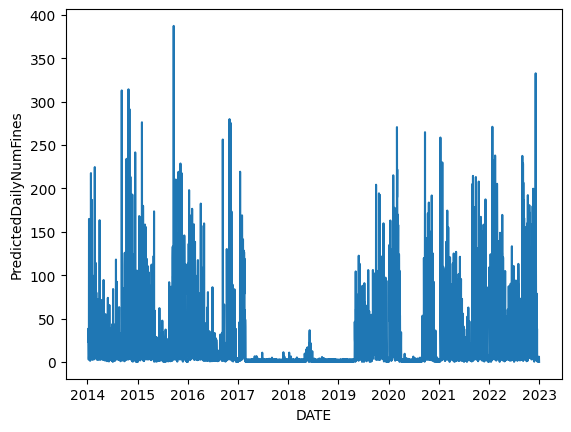

In [193]:
sns.lineplot(x="DATE", y="PredictedDailyNumFines", data=difference_df)

plt.show()

In [187]:
difference_df

,DATE,Model,PredictedDailyNumFines,Month,Day,NA_Correction,MaxTemp,MinTemp,MeanTemp,RainPrecip,SnowPrecip,Wind,CO,NO2,O3,PM10,PM25,CO_LEVEL,NO2_LEVEL,O3_LEVEL,PM10_LEVEL,PM25_LEVEL,AQI,AQI_LEVEL,Year,DailyNumFines,NumPaidFines,TotalFineAmount,AvgPaidFine,Fri,Mon,Sat,Sun,Thurs,Tues,Wed,Term,Enrollment,FullTime,Holiday,Exam,log_DailyNumFines,DailyNumFines_Lag1,DailyNumFines_Lag7,DailyNumFines_Lag14,DailyNumFines_Lag21,DailyNumFines_Lag28,Fall,Spring,Summer,Winter,MaxTemp_2,MinTemp_2,MeanTemp_2,RainPrecip_2,SnowPrecip_2,Wind_2,CO_2,NO2_2,O3_2,PM10_2,PM25_2,AQI_2,FullTime_2,DailyNumFines_Lag1_2,DailyNumFines_Lag7_2,DailyNumFines_Lag14_2,DailyNumFines_Lag21_2,DailyNumFines_Lag28_2,February,March,April,May,June,July,August,September,October,November,December,MaxTemp_MinTemp,MaxTemp_MeanTemp,MaxTemp_RainPrecip,MaxTemp_SnowPrecip,MaxTemp_Wind,MaxTemp_CO,MaxTemp_NO2,MaxTemp_O3,MaxTemp_PM10,MaxTemp_PM25,MaxTemp_AQI,MinTemp_MeanTemp,MinTemp_RainPrecip,MinTemp_SnowPrecip,MinTemp_Wind,MinTemp_CO,MinTemp_NO2,MinTemp_O3,MinTemp_PM10,MinTemp_PM25,...,PM10_November,PM10_December,PM10_Spring,PM10_Summer,PM10_Fall,PM25_DailyNumFines_Lag1,PM25_DailyNumFines_Lag7,PM25_DailyNumFines_Lag14,PM25_DailyNumFines_Lag21,PM25_DailyNumFines_Lag28,PM25_February,PM25_March,PM25_April,PM25_May,PM25_June,PM25_July,PM25_August,PM25_September,PM25_October,PM25_November,PM25_December,PM25_Spring,PM25_Summer,PM25_Fall,AQI_DailyNumFines_Lag1,AQI_DailyNumFines_Lag7,AQI_DailyNumFines_Lag14,AQI_DailyNumFines_Lag21,AQI_DailyNumFines_Lag28,AQI_February,AQI_March,AQI_April,AQI_May,AQI_June,AQI_July,AQI_August,AQI_September,AQI_October,AQI_November,AQI_December,AQI_Spring,AQI_Summer,AQI_Fall,log_DailyNumFines_change,NO2_change,Mon_change,Tues_change,Wed_change,Thurs_change,Fri_change,Sun_change,Holiday_change,Exam_change,MaxTemp_change,PM25_change,MinTemp_change,MeanTemp_change,RainPrecip_change,CO_change,SnowPrecip_change,Wind_change,O3_change,AQI_change,October_change,December_change,June_change,Wind_change,April_change,May_change,August_change,Spring_change,Summer_change,PM10_change,September_change,February_change,MaxTemp_PM25_change,MinTemp_MeanTemp_change,RainPrecip_CO_change,SnowPrecip_CO_change,Wind_NO2_change,NO2_O3_change,PM25_AQI_change,MeanTemp_October_change,RainPrecip_December_change,SnowPrecip_June_change,Wind_April_change,Wind_May_change,CO_April_change,CO_August_change,CO_December_change,CO_Spring_change,NO2_August_change,NO2_Spring_change,NO2_Summer_change,PM10_April_change,PM10_June_change,PM10_September_change,PM10_December_change,AQI_February_change,SnowPrecip_2_change
0,2014-01-06,NaN,NaN,1,Monday,False,-3.3,-17.6,-10.5,0.000000,0.000000,2.054124,1.8,3.871201,0.02200,3.871201,2.687847,Good,Good,Good,Good,Moderate,4.007333,Moderate,2014.0,23.0,17.0,386.0,22.705882,0,1,0,0,0,0,0,Winter,29642,10.134282,0,0,3.178054,NaN,NaN,NaN,NaN,NaN,0,0,0,1,10.89,309.76,110.25,0.000000,0.000000,4.219424,3.24,14.986197,0.000484,14.986197,7.224524,16.058719,102.703667,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,58.08,34.65,-0.000000,-0.000000,-6.778608,-5.94,-12.774963,-0.072600,-12.774963,-8.869897,-13.224200,184.80,-0.000000,-0.000000,-36.152578,-31.68,-68.133138,-0.387200,-68.133138,-47.306116,...,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-07,First Differences,839.902848,1,Tuesday,False,1.1,-11.6,-4.7,0.000000,0.190620,1.931521,1.9,3.871201,0.00700,4.204693,3.091042,Good,Good,Good,Moderate,Moderate,4.262680,Moderate,2014.0,52.0,46.0,1238.0,26.913043,0,0,0,0,0,1,0,Winter,29642,10.134282,0,0,3.970292,23.0,NaN,NaN,NaN,NaN,0,0,0,1,1.21,134.56,22.09,0.00000

In [195]:
np.exp(provo_first_difference.predict(provo[difference_factors].iloc[difference:])+np.log(provo["DailyNumFines"].shift(difference) + 1).iloc[1:])

1       23.758364
2       38.378805
3       12.550547
4        4.967620
5        2.586910
          ...    
3277     1.304536
3278     1.200468
3279     1.996722
3280     6.073630
3281     0.100434
Name: DailyNumFines, Length: 3281, dtype: float64

In [201]:
rf_df["DailyNumFines_Lead58"] = rf_df["DailyNumFines"].shift(-58)
rf_df[["DATE", "PredictedDailyNumFines", "DailyNumFines", "DailyNumFines_Lead58"]].to_csv("RF_Data.csv", index=False)